<a href="https://colab.research.google.com/github/daniellsaulo/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Vancouver%2C_British_Columbia_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Vancouver, British Columbia, Canada

<img src="https://raw.githubusercontent.com/daniellsaulo/data_science/master/img/Airbnb_ancouver.jpg">

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

A Startup fundada 13 anos atrás(2007), já **hospedou mais de 500 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Vancouver(British Columbia, Canada) e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados utilizados aqui, foram obtidos a partir do site  [Inside Airbnb.](http://insideairbnb.com/get-the-data.html)

Para essa análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Vancouver (good for visualisations).*




In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/daniellsaulo/data_science/master/datasets/listings.csv")


## Análise dos Dados

Nesta etapa iremos obter uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada 
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que foi utilizado é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa com 5806 entradas e 16 variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

display(df.dtypes)

Entradas:	 5806
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos em comparação ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 15% das linhas.
* A variável `name` tem aproximadamente 0,017% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

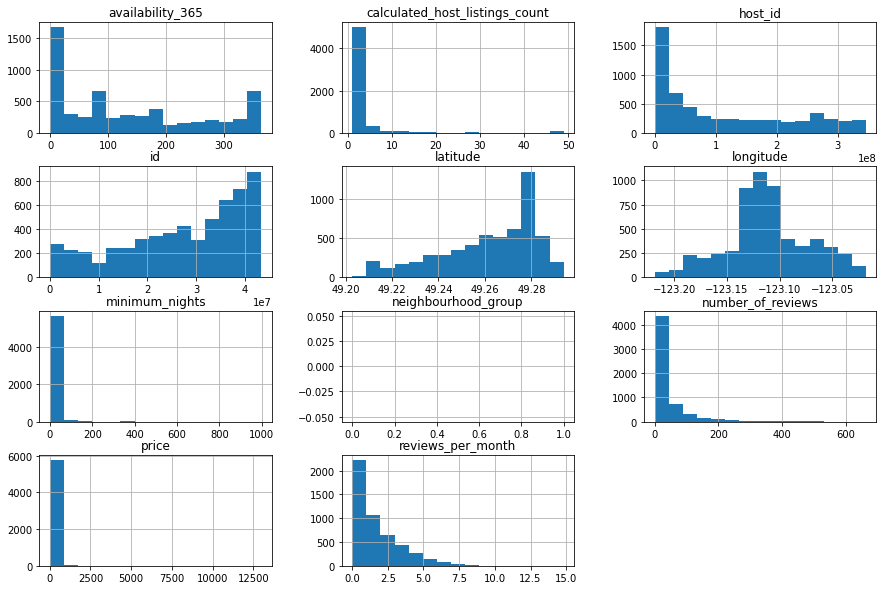

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price` e `minimum_nights`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()` ;
* Plotar `boxplots` para a variável.

In [7]:
#ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5806.000000,5806.00000,5806.000000,4938.000000,5806.000000,5806.000000
mean,174.295040,14.15794,35.012745,1.724563,3.598691,137.496900
std,266.424203,34.78132,56.734073,1.667647,7.162984,126.036135
min,13.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,1.00000,2.000000,0.430000,1.000000,6.250000
50%,125.000000,3.00000,13.000000,1.170000,1.000000,102.000000
75%,200.000000,30.00000,44.000000,2.560000,3.000000,244.000000
max,12999.000000,998.00000,662.000000,14.820000,49.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses:

* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 12999.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights

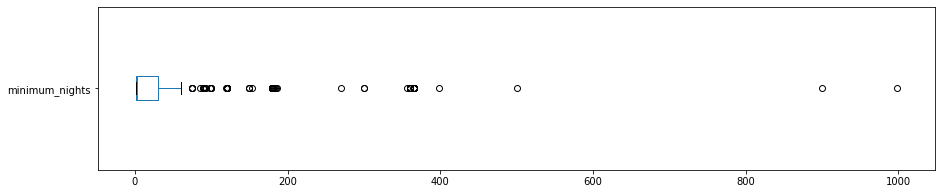


minimum_nights: valores acima de 60:
144 entradas
2.4802%


In [8]:
#minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

#ver quantidade de valores acima de 60 dias para minimum_nights
print("\nminimum_nights: valores acima de 60:")
print("{} entradas".format(len(df[df.minimum_nights > 60])))
print("{:.4f}%".format((len(df[df.minimum_nights > 60]) / df.shape[0])*100))

#### Boxplot para price

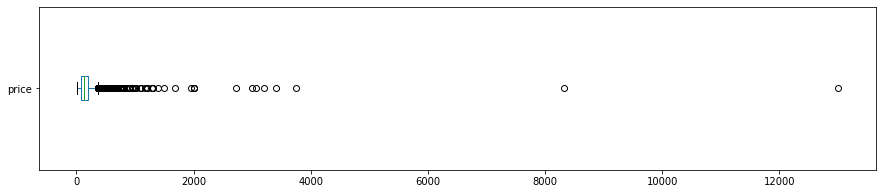


price: valores acima de 500
164 entradas
2.8247%


In [9]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

#### Histogramas sem outliers

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

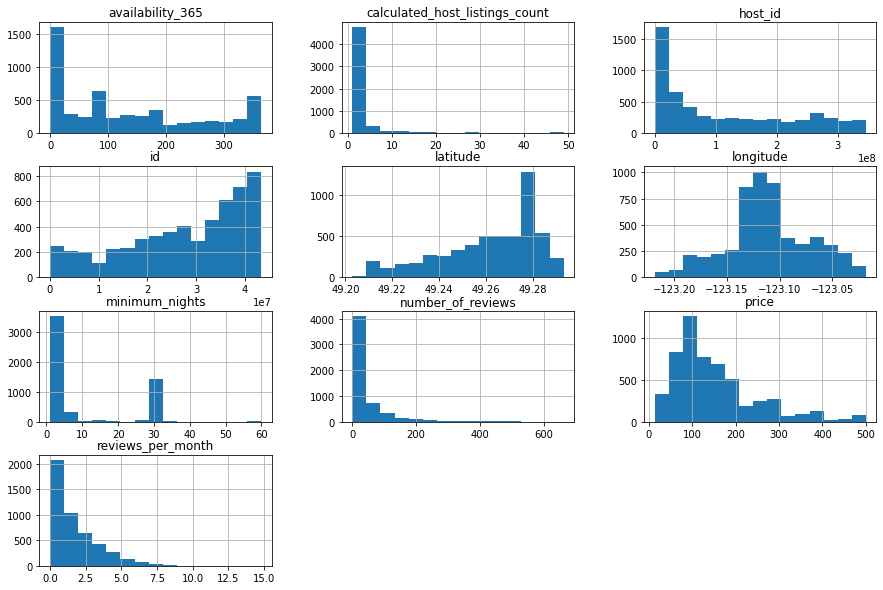

In [10]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 60].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));

### **Q5. Qual a média dos preços de aluguel?**
Abaixo iremos calcular a média dos preços praticados no Airbnb na cidade de Vancouver, dividindo a somatória dos preços pela quantidade total da coluna `price`.

In [11]:
# ver a média da coluna `price``
print("A média de preços de aluguéis em Vancouver é ${:.2f}".format(df_clean.price.mean()))


A média de preços de aluguéis em Vancouver é $151.23


### **Q6. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, onde será a função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.107632,-0.067008,-0.008483,-0.126344,0.028314
minimum_nights,-0.107632,1.000000,-0.156824,-0.302894,0.229438,0.170238
number_of_reviews,-0.067008,-0.156824,1.000000,0.674424,-0.150940,0.057788
reviews_per_month,-0.008483,-0.302894,0.674424,1.000000,-0.172599,0.020018
calculated_host_listings_count,-0.126344,0.229438,-0.150940,-0.172599,1.000000,0.093390
availability_365,0.028314,0.170238,0.057788,0.020018,0.093390,1.000000


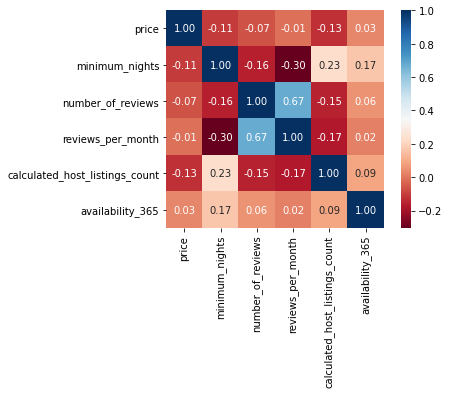

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    3975
Private room       1469
Shared room          50
Hotel room            7
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.722596
Private room       0.267042
Shared room        0.009089
Hotel room         0.001272
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Vancouver?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [21]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Downtown              182.087529
Downtown Eastside     180.755102
Kitsilano             171.026846
Mount Pleasant        162.595469
West End              157.077143
Dunbar Southlands     154.686275
West Point Grey       153.090909
South Cambie          152.939024
Fairview              145.076389
Grandview-Woodland    141.892193
Name: price, dtype: float64

COmo são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

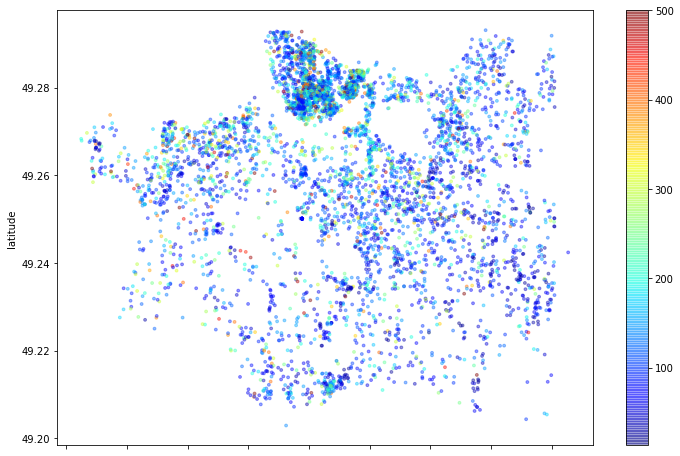

In [23]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A coluna da variável `minimum_nights` indica a quantidade mínima de noites em que cada aluguel tem como requisito no Airbnb. Abaixo veremos a média desses dados.

In [24]:
# ver a média da coluna `minimum_nights`
print("A média do mínimo de noites è: {:.1f}".format(df_clean.minimum_nights.mean()))

A média do mínimo de noites è: 10.3


## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembre-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.
